In this example, we will use the multicell module to simulate the self-organization of a geometrical Turing pattern, based on equations developed by Gierer and Meinhardt.

# Preparation

In [2]:
%matplotlib notebook

/home/jl/Library/Python/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Imports

In [3]:
import multicell
import numpy as np

# Problem definition

## Simulation and tissue structure

In [4]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 20, 1, 1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.37 s)


## Biological species

In [5]:
sim.register_cell_variable("a")
sim.register_cell_variable("h")

## Computed variables

In [6]:
def c_a2(c_a, **kwargs):
    return c_a**2

sim.register_computed_variable("c_a2", c_a2)

## Constants

In [7]:
sim.set_constants({"mu_a": 1e-1, "mu_h": 2e-1, "rho_a": 1., "rho_h": 1., "q": 1., "H": 0.35, "A": 0., "D_h": 5., "D_a": 0.025})

## Differential equations

In [8]:
def da_dt(simulation, a, c_a, c_a2, c_h, D_a, mu_a, rho_a, A, q, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) + rho_a * c_a2 / c_h / (1 + q**2 * c_a2) - mu_a * a + A


def dh_dt(simulation, h, c_a2, c_h, D_h, mu_h, rho_h, H, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_h, c_h, adjacency_matrix) + rho_h * c_a2 - mu_h * h + H

sim.set_ODE("a", da_dt)
sim.set_ODE("h", dh_dt)

In [9]:
#sim.initialize_concentrations(name="a", _min=0.28, _max=0.31)
#sim.initialize_concentrations(name="h", _min=4.37, _max=4.43)
sim.initialize_cell_variables()

a0 = np.random.uniform(0.28, 0.31, sim.n_cells)
h0 = np.random.uniform(4.37, 4.43, sim.n_cells)

sim.set_cell_variable("a", a0)
sim.set_cell_variable("h", h0)

In [10]:
help(sim.initialize_cell_variables)
help(np.random.uniform)

Help on method initialize_cell_variables in module multicell.simulation:

initialize_cell_variables(self) method of multicell.simulation.Simulation instance
    Creates the time series of cell variables and initializes all values to
    0.

Help on built-in function uniform:

uniform(...)
    uniform(low=0.0, high=1.0, size=1)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    Parameters
    ----------
    low : float, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float
        Upper boundary of the output interval.  All values generated will be
        less than high.  The default value is 1.0.
    size : int or tuple of ints, optional
 

## Duration

In [11]:
sim.set_duration(1e7)

## Tissue growth

In [13]:
sim.enable_growth(n_steps=11)
sim.register_growth_method(multicell.growth.linear_growth, {"coefficient": [1.1, 1.05, 1.]})

## Cell divisions

In [15]:
sim.enable_division(contraction=0)
sim.register_division_method(multicell.division.symmetrical_division)
sim.register_division_trigger(multicell.division.volume_trigger, {"volume_threshold": 2.})

## Dilution volumes

In [16]:
sim.register_dilution_volume_function(multicell.dilution.constant_volume, {"value": 1.})

## Rendering

In [17]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "a")


# Visualization of the initial state

<IPython.core.display.Javascript object>


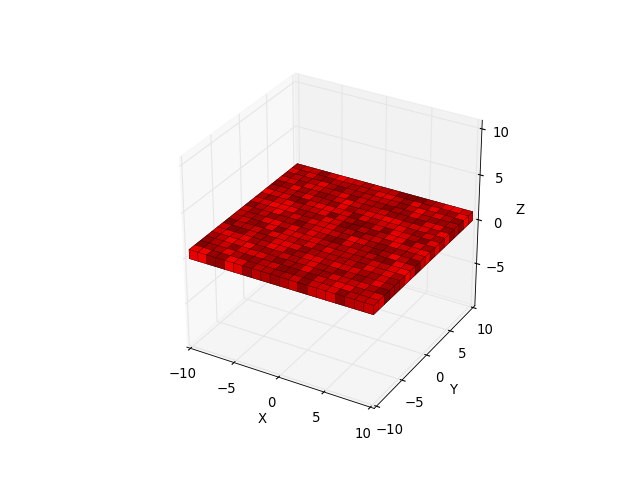

a: from 0.279759531501 to 0.310123373203
h: from 4.36503643756 to 4.4343806014
Max value displayed for a: 0.310123373203


In [18]:
sim.renderer.display("a")

# Simulation

Jacobian computation: started
Jacobian computation: finished (1.24 s)
Growth step #0
Integration of the ODE system: 25.653165102 seconds
Growth of the tissue: 0.00108599662781 seconds
Cell divisions: 0.443675994873 seconds


<IPython.core.display.Javascript object>


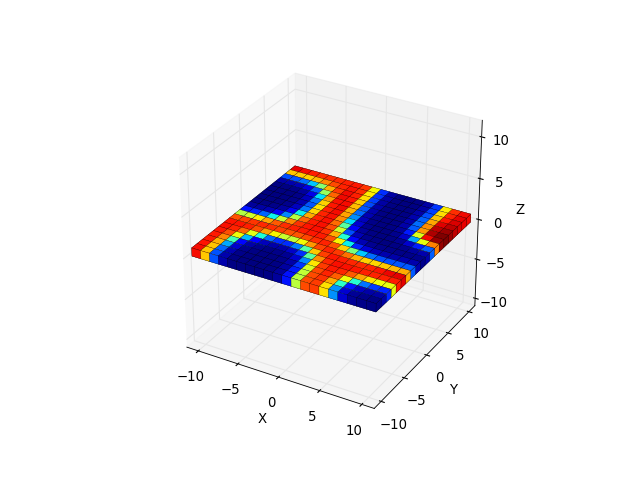

a: from 0.000536698416505 to 1.28535474783
h: from 3.79518726639 to 4.96015796485
Max value displayed for a: 1.28535474783
Jacobian computation: started
Jacobian computation: finished (1.26 s)
Growth step #1
Integration of the ODE system: 5.60740709305 seconds
Growth of the tissue: 0.00119590759277 seconds
Cell divisions: 0.449279069901 seconds


<IPython.core.display.Javascript object>


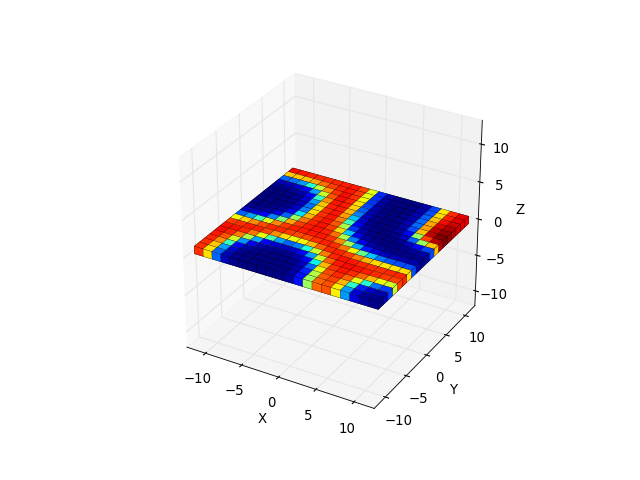

a: from 0.000453635105039 to 1.28789439212
h: from 3.8175460067 to 4.95462522726
Max value displayed for a: 1.28789439212
Jacobian computation: started
Jacobian computation: finished (1.31 s)
Growth step #2
Integration of the ODE system: 5.76097607613 seconds
Growth of the tissue: 0.00112104415894 seconds
Cell divisions: 0.444629907608 seconds


<IPython.core.display.Javascript object>


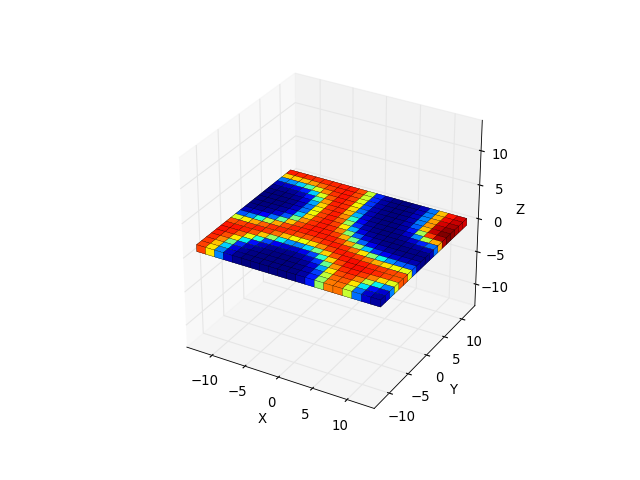

a: from 0.000435432038555 to 1.29415161736
h: from 3.82319908415 to 4.94234891709
Max value displayed for a: 1.29415161736
Jacobian computation: started
Jacobian computation: finished (1.27 s)
Growth step #3
Integration of the ODE system: 11.0036160946 seconds
Growth of the tissue: 0.00114297866821 seconds
Cell divisions: 0.452718019485 seconds


<IPython.core.display.Javascript object>


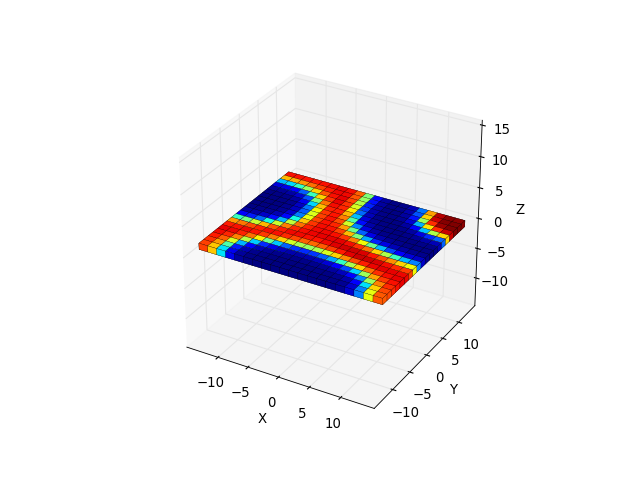

a: from 0.000635429059629 to 1.26135700949
h: from 3.77740189473 to 4.929080247
Max value displayed for a: 1.26135700949
Jacobian computation: started
Jacobian computation: finished (1.25 s)
Growth step #4
Integration of the ODE system: 5.45196914673 seconds
Growth of the tissue: 0.00114607810974 seconds
Cell divisions: 1.66817116737 seconds


<IPython.core.display.Javascript object>


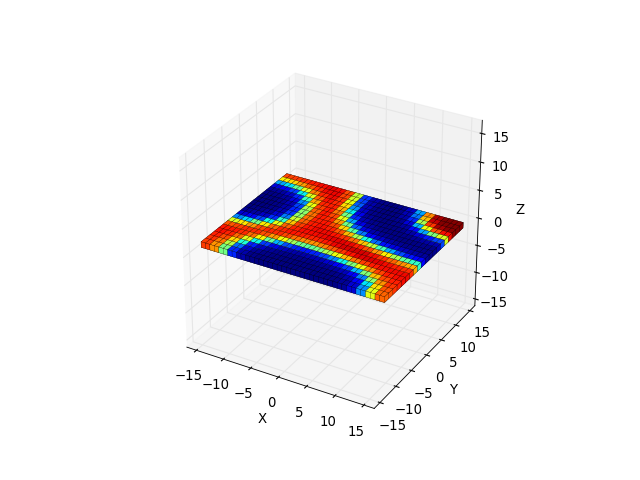

a: from 0.000373291136764 to 0.63657324335
h: from 1.90527731043 to 2.46549775653
Max value displayed for a: 0.63657324335
Jacobian computation: started
Jacobian computation: finished (4.75 s)
Growth step #5
Integration of the ODE system: 32.7902829647 seconds
Growth of the tissue: 0.00359797477722 seconds
Cell divisions: 1.33445501328 seconds


<IPython.core.display.Javascript object>


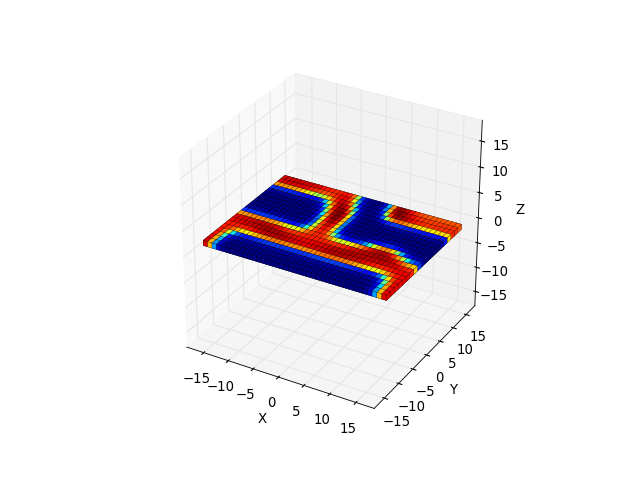

a: from 0.000654983475631 to 1.21915165363
h: from 3.54819036948 to 5.06367262954
Max value displayed for a: 1.21915165363
Jacobian computation: started
Jacobian computation: finished (4.72 s)
Growth step #6
Integration of the ODE system: 15.7667510509 seconds
Growth of the tissue: 0.00338196754456 seconds
Cell divisions: 1.33748102188 seconds


<IPython.core.display.Javascript object>


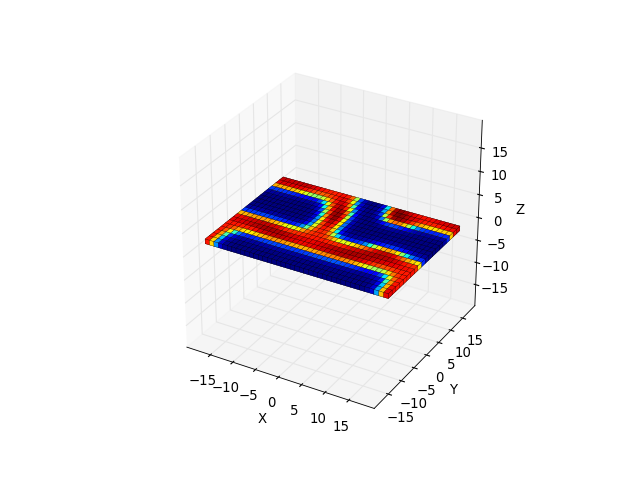

a: from 0.000840037309994 to 1.2301465308
h: from 3.60352027673 to 5.0151992837
Max value displayed for a: 1.2301465308
Jacobian computation: started
Jacobian computation: finished (4.77 s)
Growth step #7
Integration of the ODE system: 62.7419919968 seconds
Growth of the tissue: 0.00328397750854 seconds
Cell divisions: 1.3382589817 seconds


<IPython.core.display.Javascript object>


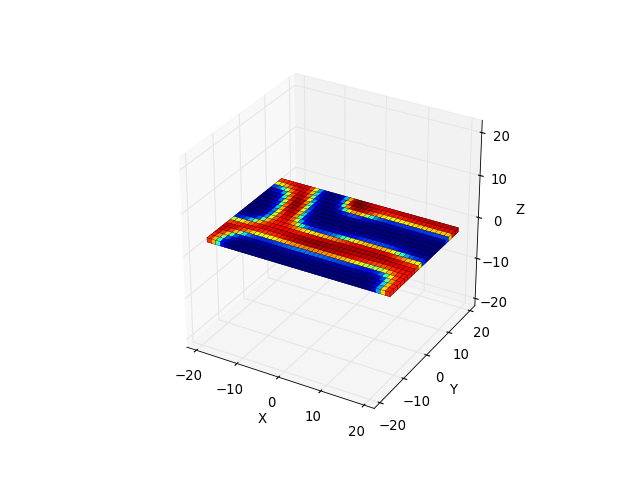

a: from 0.000464035081866 to 1.23617476004
h: from 3.66634844324 to 4.98663234081
Max value displayed for a: 1.23617476004
Jacobian computation: started
Jacobian computation: finished (4.71 s)
Growth step #8
Integration of the ODE system: 9.7596578598 seconds
Growth of the tissue: 0.00336790084839 seconds
Cell divisions: 1.31362390518 seconds


<IPython.core.display.Javascript object>


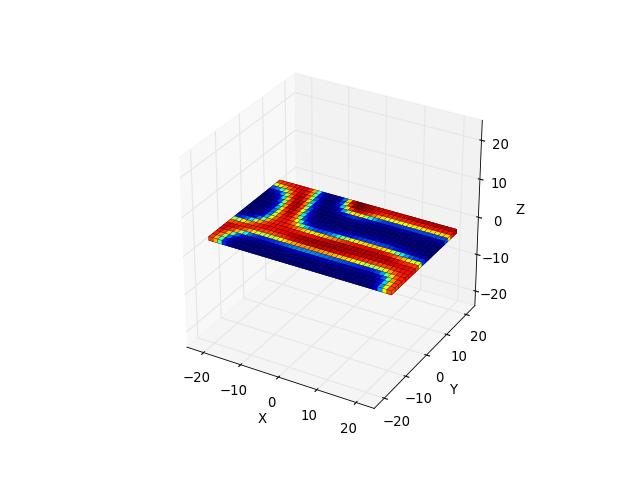

a: from 0.000553784374603 to 1.25269800296
h: from 3.72165663556 to 4.95576908219
Max value displayed for a: 1.25269800296
Jacobian computation: started
Jacobian computation: finished (4.75 s)
Growth step #9
Integration of the ODE system: 14.7987630367 seconds
Growth of the tissue: 0.00335216522217 seconds
Cell divisions: 4.38578391075 seconds


<IPython.core.display.Javascript object>


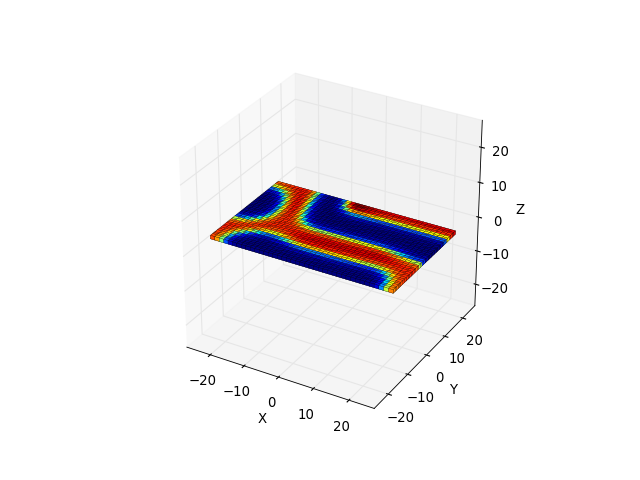

a: from 0.000334086983703 to 0.648695310751
h: from 1.8489445795 to 2.47101292268
Max value displayed for a: 0.648695310751
Jacobian computation: started
Jacobian computation: finished (18.58 s)
Growth step #10
Integration of the ODE system: 170.012423992 seconds
Growth of the tissue: 0.00839805603027 seconds
Cell divisions: 3.68096709251 seconds


<IPython.core.display.Javascript object>


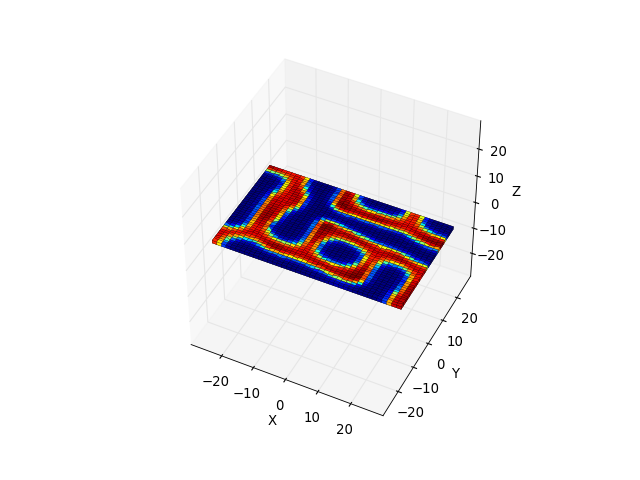

a: from 0.000204716092705 to 1.23630138963
h: from 3.51690509476 to 4.99191885444
Max value displayed for a: 1.23630138963


In [19]:
sim.simulate()